In [1]:
import numpy as np
import scanpy as sc
import scycle as cc
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 70

import os

import sys
DATA_PATH = '/home/risitop/OneDrive/Documents/PHD/y1/data/EwingSarcoma_Miller2020/'
sys.path.append(DATA_PATH)
plt.style.use('dark_background')

In [7]:
## We start from CPM_data.h5ad, which contains CPM_data.txt + Metadata.txt annotations
adata = sc.read_h5ad(DATA_PATH + 'CHLA9.h5ad')

## Computing a cell cycle trajectory estimation on a dataset copy
adata_tmp = adata.copy()
cc.pp.prep_pooling(adata_tmp, filter_cells=True, max_counts=50000)
cc.tl.dimensionality_reduction(adata_tmp, method="ica")
cc.tl.enrich_components(adata_tmp)
cc.tl.principal_circle(adata_tmp, verbose=False, n_nodes=30)
cc.tl.pseudotime(adata_tmp, scale=False)

## Normalize the raw dataset with respect to the trajectory
adata_no_circle = adata.copy()
cc.pp.normalize_by_partition(adata, adata_tmp, verbose=False)

## Standard kNN-pooling + PCA
cc.pp.prep_pooling(adata, filter_cells=False, max_counts=50000)
cc.pp.prep_pooling(adata_no_circle, filter_cells=True, max_counts=50000)

# adata = sc.read_h5ad(DATA_PATH + 'CHLA9_pp.h5ad')

Preparing embedding...
3862 samples pass the count filter
4547  samples pass the mt filter
Samples selected 3806
Embedding for pooling...
Pooling 3806 samples...
-- Dimensionality reduction using ICA...
FastICA from sklearn did not converge due to numerical instabilities - Retrying...
-- Done
G1/S  score: 7.255049
G2/M+ score: 10.005018
G2/M- score: 6.235838
HIST  score: 17.331943
--- Selected components:
G1/S: 1 (score=7.255049)
G2/M: 14 (score=10.005018)
G2/M-: 13 (score=6.235838)
Histones: 2 (score=17.331943)
Calculating pseudotimes for each cell...
Preparing embedding...
Embedding for pooling...
Pooling 3806 samples...
Preparing embedding...
3862 samples pass the count filter
4547  samples pass the mt filter
Samples selected 3806
Embedding for pooling...
Pooling 3806 samples...


In [8]:
# adata.write_h5ad(DATA_PATH + 'CHLA9_pp.h5ad')

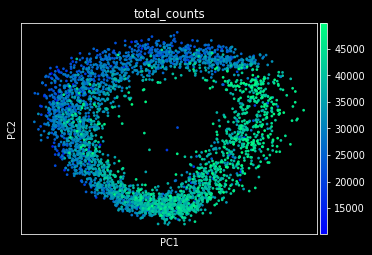

In [9]:
sc.tl.pca(adata_no_circle, n_comps=30)
sc.pl.pca(adata_no_circle, cmap='winter', color='total_counts')

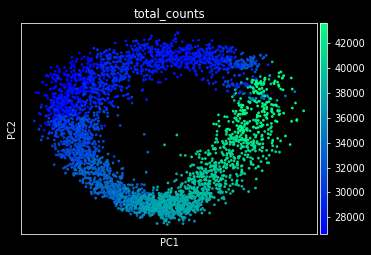

In [10]:
sc.tl.pca(adata, n_comps=30)
sc.pl.pca(adata, cmap='winter', color='total_counts')

In [11]:
cc.tl.dimensionality_reduction(adata, method="ica")
cc.tl.enrich_components(adata, verbose=True)

-- Dimensionality reduction using ICA...
-- Done
G1/S  score: 7.254609
G2/M+ score: 10.098766
G2/M- score: 6.130354
HIST  score: 17.174899
--- Selected components:
G1/S: 1 (score=7.254609)
G2/M: 13 (score=10.098766)
G2/M-: 10 (score=6.130354)
Histones: 2 (score=17.174899)


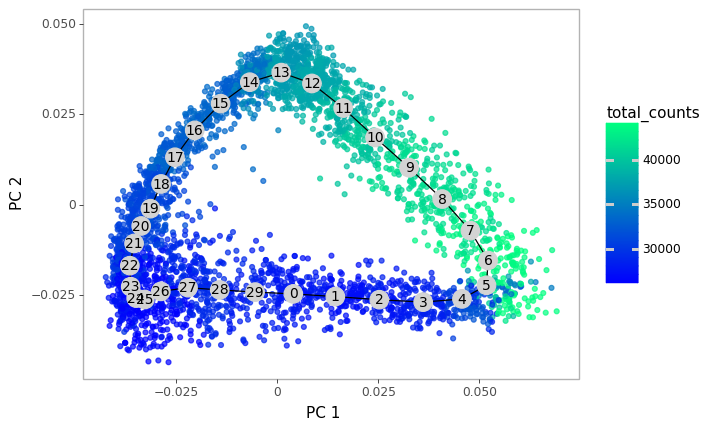

<ggplot: (8790741588947)>

In [12]:
cc.tl.principal_circle(adata)
cc.pl.scatter_projection(adata, palette='winter', trajectory=True)